In [43]:
from learningAgents import ReinforceAlgorithm
from environmentModel import Model, AdversaryModes
from NeuralNetwork import NeuralNetwork
import torch
import torch.nn as nn
from torch.distributions import Categorical

In [44]:
adversaryProbs=torch.zeros(len(AdversaryModes))
adversaryProbs[0]=0
adversaryProbs[1]=1/2
adversaryProbs[2]=1/2
game = Model(totalDemand = 400, 
               tupleCosts = (57, 71),
              totalStages = 25,
            initState = [200,200], adversaryProbs=adversaryProbs)
adversaryProbs

tensor([0.0000, 0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000])

In [45]:
game.reset()

(tensor([200., 200.]), 0, False)

In [46]:
game.adversaryChoosePrice()

95

In [47]:


# Hyperparameters
# def NeuralNetwork():
#     lr = .000001
#     num_actions = 50

#     nn_ = 100

#     policy = nn.Sequential(
#                            nn.Linear(2, nn_), 
#                            nn.ReLU(),
#                            nn.Linear(nn_,nn_),
#                            nn.ReLU(),
#                            nn.Linear(nn_,num_actions),                       
#                            nn.Softmax(dim=0))
#     optim = torch.optim.Adam(policy.parameters(), lr=lr)

#     return policy, optim


In [65]:

lr = .000001
num_actions = 50

nn_ = 100

policy = nn.Sequential(
                       nn.Linear(2, nn_), 
                       nn.ReLU(),
                       nn.Linear(nn_,nn_),
                       nn.ReLU(),
                       nn.Linear(nn_,num_actions),                       
                       nn.Softmax(dim=0))
optim = torch.optim.Adam(policy.parameters(), lr=lr)

policy


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=50, bias=True)
  (5): Softmax(dim=0)
)

In [48]:
neuralNet=NeuralNetwork()
algorithm = ReinforceAlgorithm(game, neuralNet, numberIterations=1, numberEpisodes=10_000, discountFactor =0.9)

0


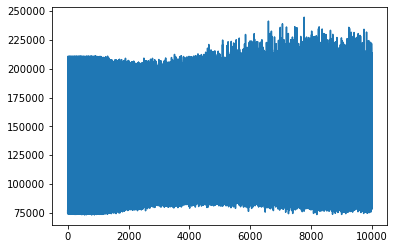

In [49]:
algorithm.solver()

In [50]:
name=f"nn, ep={algorithm.numberEpisodes}"
neuralNet.save(name=name)

In [51]:
neuralNet.load(name=name)

In [52]:
algorithm.bestAverageRetu

143329.38640393192

In [53]:
import pandas as pd
profits = pd.DataFrame(game.profit).T
prices = pd.DataFrame(game.prices).T
demandPotential = pd.DataFrame(game.demandPotential).T
learning = pd.DataFrame(algorithm.returns.mean(axis = 0),columns=['entry'])

,0,1
0,200.000000,200.000000
1,202.250000,197.750000
2,199.437500,200.562500
3,197.328125,202.671875
4,191.246094,208.753906
5,191.184570,208.815430
6,186.638428,213.361572
7,180.728821,219.271179
8,183.296616,216.703384
9,180.722462,219.277538


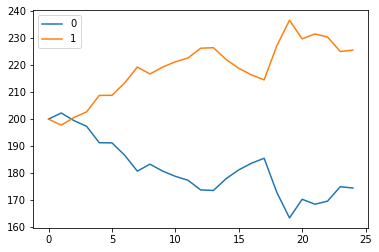

In [54]:
demandPotential.plot()
demandPotential

In [55]:
profits.sum(axis=0)

0    83042.463918
1    76910.914717
dtype: float64

,0,1
0,3668.250000,2520.000000
1,4433.390625,2466.000000
2,4231.110352,2533.500000
3,4522.995667,2584.125000
4,3664.503422,2730.093750
5,4101.374727,2731.570312
6,3976.530486,2840.677734
7,2986.205274,2982.508301
8,3587.708778,2920.881226
9,3426.811882,2982.660919


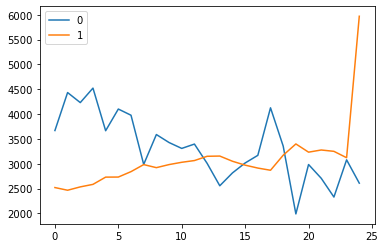

In [56]:
profits.plot()
profits


<AxesSubplot:>

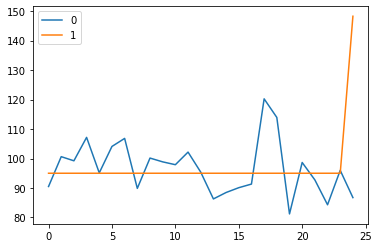

In [57]:
prices.plot()

<AxesSubplot:>

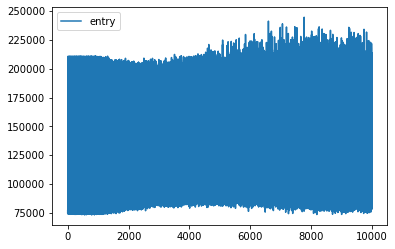

In [58]:
learning.plot()

In [59]:
# pricelearning = pd.DataFrame(game.prices.mean(axis = 0))
# pricelearning.plot()

In [60]:
from matplotlib import pyplot as plt
import numpy as np

In [61]:
learning = learning.to_numpy()
learning_2 = [0]*len(learning)
for i in range(len(learning)):
    learning_2[i] = learning[i][0]

In [62]:
avg_learning = np.convolve(learning_2, np.ones(1000)/1000, mode = 'valid')

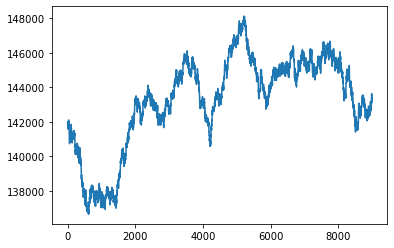

In [63]:
plt.plot(avg_learning)
plt.show()